In [1]:
#Importación de librerias

import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)

In [2]:
# Importar datos
layoffs = pd.read_csv('../data/layoffs.csv')

## GENERAL VISION

--------------------------------------------------------------------------------------------------------------------------------------------------

In [3]:
layoffs.head(20)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,3/6/2023,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,3/6/2023,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,3/6/2023,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,3/6/2023,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,3/3/2023,Unknown,Brazil,788.0
5,Embark Trucks,SF Bay Area,Transportation,230.0,0.70,3/3/2023,Post-IPO,United States,317.0
6,Lendi,Sydney,Real Estate,100.0,NaN,3/3/2023,Unknown,Australia,59.0
7,UserTesting,SF Bay Area,Marketing,63.0,NaN,3/3/2023,Acquired,United States,152.0
8,Airbnb,SF Bay Area,NaN,30.0,NaN,3/3/2023,Post-IPO,United States,6400.0
9,Accolade,Seattle,Healthcare,NaN,NaN,3/3/2023,Post-IPO,United States,458.0


In [4]:
layoffs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2361 entries, 0 to 2360
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                2361 non-null   object 
 1   location               2361 non-null   object 
 2   industry               2357 non-null   object 
 3   total_laid_off         1621 non-null   float64
 4   percentage_laid_off    1576 non-null   float64
 5   date                   2360 non-null   object 
 6   stage                  2355 non-null   object 
 7   country                2361 non-null   object 
 8   funds_raised_millions  2152 non-null   float64
dtypes: float64(3), object(6)
memory usage: 965.0 KB


In [5]:
len(layoffs) # Check number of rows before removing duplicates

2361

## CLEANING THE DATA

--------------------------------------------------------------------------------------------------------------------------------------------------

## 1. Duplicates

In [6]:
layoffs.drop_duplicates(inplace=True) # Remove duplicates
len(layoffs)# Check new number of rows

2356

In [7]:
layoffs.duplicated().sum() # Check whether a row is a duplicated version of a previous row

0

## 2. Standarize

--------------------------------------------------------------------------------------------------------------------------------------------------

Escribir una función que estandarize el texto de las columnas texto. La función debería:
    Remover whitespaces, Lowercase characters, Remover números, Remover puntuacion

In [8]:
# %pip install thefuzz
# %pip show thefuzz


In [9]:
# Función para encontrar y unificar nombres similares

from thefuzz import fuzz
from thefuzz import process

# Crear una lista de nombres únicos de compañías
unique_companies = layoffs['company'].unique()

def unify_company_names(company_name, unique_names, threshold=80):
    match = process.extractOne(company_name, unique_names, scorer=fuzz.ratio)
    if match[1] >= threshold:
        return match[0]
    return company_name

# Aplicar la función para unificar nombres en la columna 'company'
layoffs['company'] = layoffs['company'].apply(lambda x: unify_company_names(x, unique_companies))

In [10]:
layoffs['industry'].unique()

array(['Other', 'Media', 'Retail', 'Education', 'Real Estate',
       'Transportation', 'Marketing', nan, 'Healthcare', 'Security',
       'Food', 'Fitness', 'Consumer', 'Logistics', 'HR', 'Support',
       'Travel', 'Crypto', 'Finance', 'Data', 'Sales', 'Infrastructure',
       'Hardware', 'Product', 'Construction', 'Legal', 'Energy',
       'Manufacturing', 'Recruiting', 'Aerospace', 'Crypto Currency',
       'Fin-Tech', 'CryptoCurrency'], dtype=object)

In [11]:
layoffs['industry'] = layoffs['industry'].replace({'.*Crypto.*': 'Crypto'}, regex=True)

## 3. Remove null or blank values

In [12]:
# Counting the number of NaN for each column
layoffs.isnull().sum().sort_values(ascending=False)

percentage_laid_off      784
total_laid_off           739
funds_raised_millions    209
stage                      6
industry                   4
date                       1
company                    0
location                   0
country                    0
dtype: int64

In [13]:
# Counting the percentage of NaN for each column
layoffs.isnull().sum().sort_values(ascending=False)/len(layoffs) #NaN percentage for each column


percentage_laid_off      0.332767
total_laid_off           0.313667
funds_raised_millions    0.088710
stage                    0.002547
industry                 0.001698
date                     0.000424
company                  0.000000
location                 0.000000
country                  0.000000
dtype: float64

#  Reemplazar los valores faltantes con la media, mediana o moda

--------------------------------------------------------------------------------------------------------------------------------------------------

In [14]:
layoffs.isnull().sum()

company                    0
location                   0
industry                   4
total_laid_off           739
percentage_laid_off      784
date                       1
stage                      6
country                    0
funds_raised_millions    209
dtype: int64

In [15]:
#Drop rows where value is missing
layoffs.dropna(subset=['stage'], inplace=True)
layoffs.dropna(subset=['industry'], inplace=True)
layoffs.dropna(subset=['funds_raised_millions'], inplace=True)

In [16]:
#Replace missing values with median, mean, mode
layoffs['total_laid_off'].fillna(layoffs['total_laid_off'].mode()[0], inplace=True)
layoffs['percentage_laid_off'].fillna(layoffs['percentage_laid_off'].mode()[0], inplace=True)

In [17]:
layoffs.shape

(2141, 9)

In [18]:
layoffs.describe().T

,count,mean,std,min,25%,50%,75%,max
total_laid_off,2141.0,185.884633,622.517733,3.0,50.0,100.0,110.0,12000.0
percentage_laid_off,2141.0,0.201456,0.215037,0.0,0.1,0.1,0.2,1.0
funds_raised_millions,2141.0,818.788088,5606.534076,0.0,50.0,156.0,441.0,121900.0


# EXPLORATORY DATA ANALYSIS

In [19]:
layoffs['total_laid_off'] = layoffs['total_laid_off'].astype('int64')
layoffs['percentage_laid_off'] = layoffs['percentage_laid_off'].astype('float64')
layoffs['funds_raised_millions'] = layoffs['funds_raised_millions'].astype('float64')
layoffs['date'] = pd.to_datetime(layoffs['date'])

In [20]:
layoffs.to_csv('layoffs_clean.csv', index=False, decimal=',')

## FORECAST

16:04:59 - cmdstanpy - INFO - Chain [1] start processing
16:04:59 - cmdstanpy - INFO - Chain [1] done processing


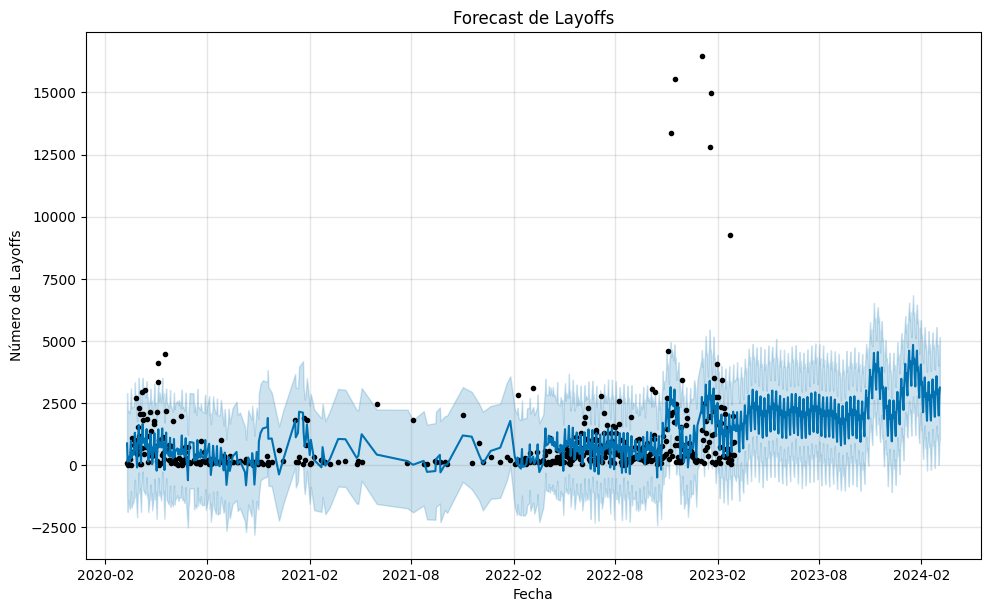

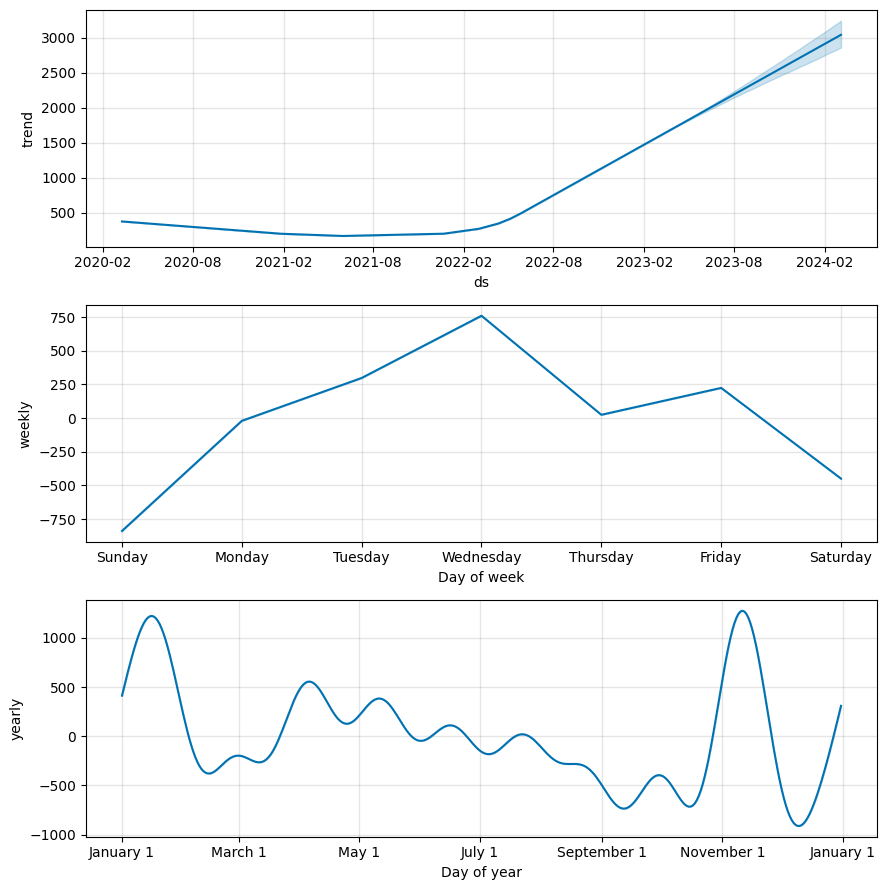

In [41]:
from prophet import Prophet
import matplotlib.pyplot as plt


layoffs['date'] = pd.to_datetime(layoffs['date'])
df_agg = layoffs.groupby('date').sum().reset_index()
df_agg = df_agg.rename(columns={'date': 'ds', 'total_laid_off': 'y'})

# Crear el modelo Prophet
model = Prophet()

# Entrenar el modelo
model.fit(df_agg)

# Crear un DataFrame de futuras fechas para hacer el pronóstico
future = model.make_future_dataframe(periods=365)

# Hacer el pronóstico
forecast = model.predict(future)

# Visualizar el pronóstico
fig = model.plot(forecast)
plt.title('Forecast de Layoffs')
plt.xlabel('Fecha')
plt.ylabel('Número de Layoffs')
plt.show()

# Visualizar los componentes del pronóstico
fig2 = model.plot_components(forecast)
plt.show()